In [1]:
!pip install lightgbm

In [2]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv('C:\\Users\\82102\\Desktop\\Test\\income\\final1612.csv',encoding='euc-kr')
df.head()

,시군구명,성별,연령,직업구분,소득분위,평균소득,평균소비,평균처분가능소득,연소득,소득대비소비,중위소득,중위처분가능소득,소득분위배율,class,Unnamed: 14,Unnamed: 15
0,강화군,0,0,0,0,2789.0,11497.0,2051.0,33468,0.656478,2400.0,2000.0,202.7,B,NaN,NaN
1,강화군,0,0,0,1,1376.0,7528.0,458.0,16512,0.544089,1500.0,518.0,100.0,B,NaN,NaN
2,강화군,0,0,0,2,1815.0,5393.0,1532.0,21780,0.752388,1800.0,1800.0,131.9,B,NaN,NaN
3,강화군,0,0,0,3,2062.0,6525.0,1680.0,24744,0.736300,2000.0,2000.0,149.9,B,NaN,NaN
4,강화군,0,0,0,4,2322.0,7753.0,1924.0,27864,0.721756,2300.0,2260.0,168.8,B,NaN,NaN


In [4]:
df.drop(['Unnamed: 14','Unnamed: 15'],axis=1,inplace=True)

In [5]:
df

,시군구명,성별,연령,직업구분,소득분위,평균소득,평균소비,평균처분가능소득,연소득,소득대비소비,중위소득,중위처분가능소득,소득분위배율,class
0,강화군,0,0,0,0,2789.0,11497.0,2051.0,33468,0.656478,2400.0,2000.0,202.7,B
1,강화군,0,0,0,1,1376.0,7528.0,458.0,16512,0.544089,1500.0,518.0,100.0,B
2,강화군,0,0,0,2,1815.0,5393.0,1532.0,21780,0.752388,1800.0,1800.0,131.9,B
3,강화군,0,0,0,3,2062.0,6525.0,1680.0,24744,0.736300,2000.0,2000.0,149.9,B
4,강화군,0,0,0,4,2322.0,7753.0,1924.0,27864,0.721756,2300.0,2260.0,168.8,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14315,중구,2,90,0,1,NaN,17408.0,NaN,0,0.000000,NaN,NaN,NaN,NaN
14316,중구,2,90,0,4,NaN,5869.0,NaN,0,0.000000,NaN,NaN,NaN,NaN
14317,중구,2,90,4,0,NaN,5894.0,NaN,0,0.000000,NaN,NaN,NaN,NaN
14318,중구,2,90,4,1,NaN,NaN,NaN,0,0.000000,NaN,NaN,NaN,NaN


In [6]:
df['class']=0

In [7]:
df.dropna(axis=0)

,시군구명,성별,연령,직업구분,소득분위,평균소득,평균소비,평균처분가능소득,연소득,소득대비소비,중위소득,중위처분가능소득,소득분위배율,class
0,강화군,0,0,0,0,2789.0,11497.0,2051.0,33468,0.656478,2400.0,2000.0,202.7,0
1,강화군,0,0,0,1,1376.0,7528.0,458.0,16512,0.544089,1500.0,518.0,100.0,0
2,강화군,0,0,0,2,1815.0,5393.0,1532.0,21780,0.752388,1800.0,1800.0,131.9,0
3,강화군,0,0,0,3,2062.0,6525.0,1680.0,24744,0.736300,2000.0,2000.0,149.9,0
4,강화군,0,0,0,4,2322.0,7753.0,1924.0,27864,0.721756,2300.0,2260.0,168.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14298,중구,2,70,4,9,4091.0,14806.0,2156.0,49092,0.698403,3900.0,2914.0,312.1,0
14305,중구,2,80,1,0,1500.0,5420.0,-1609.0,18000,0.698889,1500.0,1500.0,100.0,0
14306,중구,2,80,1,1,1500.0,5664.0,-1609.0,18000,0.685333,1500.0,1500.0,100.0,0
14309,중구,2,80,4,0,1514.0,4954.0,1250.0,18168,0.727323,1500.0,1500.0,101.1,0


In [8]:
g=df[df['평균처분가능소득']<600].index
df.drop(g,inplace=True)
df.dropna(axis=0,inplace=True)
v=df['평균처분가능소득']
df

,시군구명,성별,연령,직업구분,소득분위,평균소득,평균소비,평균처분가능소득,연소득,소득대비소비,중위소득,중위처분가능소득,소득분위배율,class
0,강화군,0,0,0,0,2789.0,11497.0,2051.0,33468,0.656478,2400.0,2000.0,202.7,0
2,강화군,0,0,0,2,1815.0,5393.0,1532.0,21780,0.752388,1800.0,1800.0,131.9,0
3,강화군,0,0,0,3,2062.0,6525.0,1680.0,24744,0.736300,2000.0,2000.0,149.9,0
4,강화군,0,0,0,4,2322.0,7753.0,1924.0,27864,0.721756,2300.0,2260.0,168.8,0
5,강화군,0,0,0,5,2548.0,8344.0,2227.0,30576,0.727106,2600.0,2500.0,185.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,중구,2,70,4,6,2728.0,12717.0,2547.0,32736,0.611529,2700.0,2700.0,208.1,0
14297,중구,2,70,4,8,3317.0,9793.0,1481.0,39804,0.753969,3250.0,3200.0,253.0,0
14298,중구,2,70,4,9,4091.0,14806.0,2156.0,49092,0.698403,3900.0,2914.0,312.1,0
14309,중구,2,80,4,0,1514.0,4954.0,1250.0,18168,0.727323,1500.0,1500.0,101.1,0


In [80]:
a=21000
b=12000
c=8000
d=4500
e=2700
f=600

In [81]:
def get_score(v):
    if v >a:
        score = 'A'
    elif (v <=a) & (v >b):
        score = 'B'
    elif (v <=b) & (v >c):
        score = 'C'
    elif (v <=c) & (v >d):
        score = 'D'
    elif (v <=d) & (v >e):
        score = 'E'
    elif (v <=e) & (v >f):
        score = 'F'
    else:
        score = 'G'
    return score


df["class"] = df["평균처분가능소득"].apply(lambda v: get_score(v))
df

,시군구명,성별,연령,직업구분,소득분위,평균소득,평균소비,평균처분가능소득,연소득,소득대비소비,중위소득,중위처분가능소득,소득분위배율,class
0,강화군,0,0,0,0,2789.0,11497.0,2051.0,33468,0.656478,2400.0,2000.0,202.7,F
2,강화군,0,0,0,2,1815.0,5393.0,1532.0,21780,0.752388,1800.0,1800.0,131.9,F
3,강화군,0,0,0,3,2062.0,6525.0,1680.0,24744,0.736300,2000.0,2000.0,149.9,F
4,강화군,0,0,0,4,2322.0,7753.0,1924.0,27864,0.721756,2300.0,2260.0,168.8,F
5,강화군,0,0,0,5,2548.0,8344.0,2227.0,30576,0.727106,2600.0,2500.0,185.2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,중구,2,70,4,6,2728.0,12717.0,2547.0,32736,0.611529,2700.0,2700.0,208.1,F
14297,중구,2,70,4,8,3317.0,9793.0,1481.0,39804,0.753969,3250.0,3200.0,253.0,F
14298,중구,2,70,4,9,4091.0,14806.0,2156.0,49092,0.698403,3900.0,2914.0,312.1,F
14309,중구,2,80,4,0,1514.0,4954.0,1250.0,18168,0.727323,1500.0,1500.0,101.1,F


In [82]:
data=df.drop(['시군구명','연령','성별','직업구분','소득분위','평균처분가능소득','중위처분가능소득','class'],axis=1).values
target=df['class'].values

In [83]:
print(data.shape)
print(data[:3],'\n')
print(target[:3])

(10238, 6)
[[2.78900000e+03 1.14970000e+04 3.34680000e+04 6.56477830e-01
  2.40000000e+03 2.02700000e+02]
 [1.81500000e+03 5.39300000e+03 2.17800000e+04 7.52387511e-01
  1.80000000e+03 1.31900000e+02]
 [2.06200000e+03 6.52500000e+03 2.47440000e+04 7.36299709e-01
  2.00000000e+03 1.49900000e+02]] 

['F' 'F' 'F']


In [84]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=156)

In [85]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals=[(x_test,y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(x_test)

C:\Users\82102\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\82102\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.572636
[2]	valid_0's multi_logloss: 0.532902
[3]	valid_0's multi_logloss: 0.565927
[4]	valid_0's multi_logloss: 0.511077
[5]	valid_0's multi_logloss: 0.406521
[6]	valid_0's multi_logloss: 0.509135
[7]	valid_0's multi_logloss: 0.609257
[8]	valid_0's multi_logloss: 0.364678
[9]	valid_0's multi_logloss: 0.499116
[10]	valid_0's multi_logloss: 0.338896
[11]	valid_0's multi_logloss: 0.566544
[12]	valid_0's multi_logloss: 0.506373
[13]	valid_0's multi_logloss: 0.837351
[14]	valid_0's multi_logloss: 0.296694
[15]	valid_0's multi_logloss: 0.528497
[16]	valid_0's multi_logloss: 0.357232
[17]	valid_0's multi_logloss: 0.815548
[18]	valid_0's multi_logloss: 0.39414
[19]	valid_0's multi_logloss: 1.21338
[20]	valid_0's multi_logloss: 0.469118
[21]	valid_0's multi_logloss: 1.12229
[22]	valid_0's multi_logloss: 0.402052
[23]	valid_0's multi_logloss: 1.22788
[24]	valid_0's multi_logloss: 0.465944
[25]	valid_0's multi_logloss: 1.236
[26]	valid_0's multi_logloss: 0.618361
[2

In [86]:
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]
pred_proba[:3]

array([0.0004114, 0.0004114, 0.0004114])

In [87]:
def get_clf_eval(y_test,pred = None,pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = round(precision_score(y_test, pred, average='micro'), ndigits=3)
    recall = round(recall_score(y_test, pred, average='micro'), ndigits=3)
    f1 = round(f1_score(y_test, pred, average='micro'), ndigits=3)
    print('정확도:{0:,f},정밀도:{1:f},\
    재현율:{2:f},f1:{3:f}'.format(accuracy,precision,recall,f1),'\n')
    

In [88]:
get_clf_eval(y_test,preds,pred_proba)

정확도:0.912598,정밀도:0.913000,    재현율:0.913000,f1:0.913000 



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

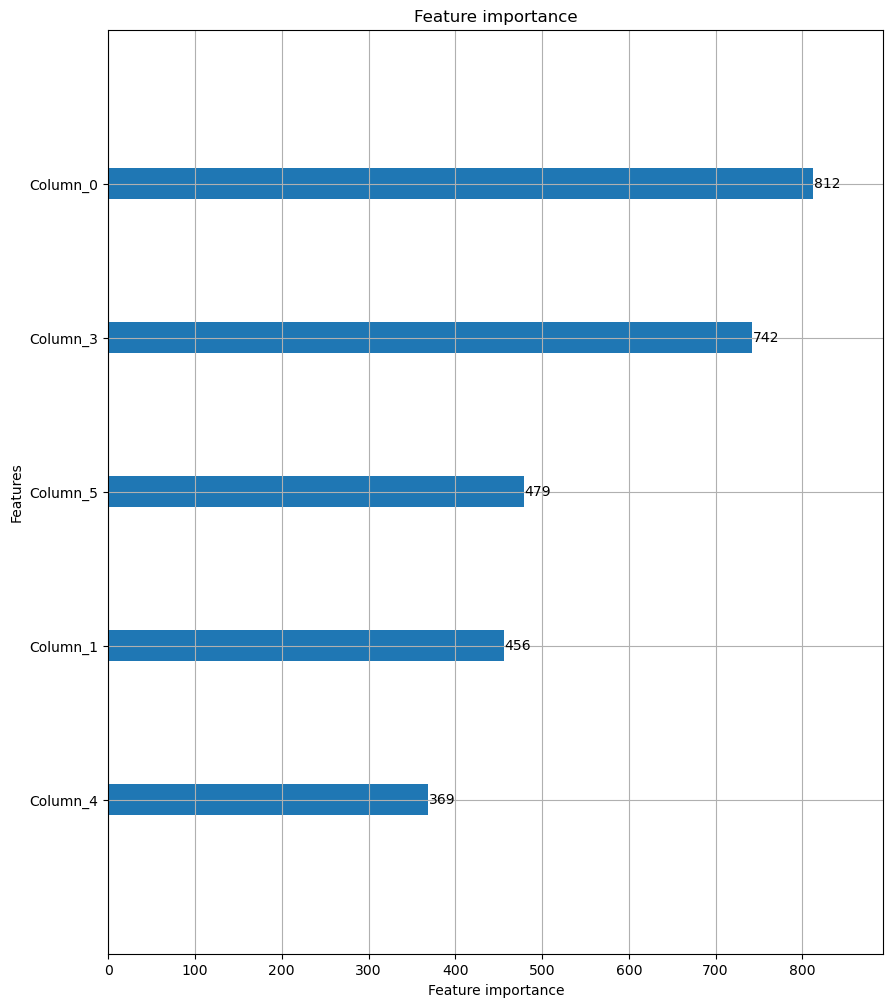

In [89]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax= plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)